# 1 - CosMx

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)  # show all columns
import json

import os

In [2]:
base_path = '/Volumes/Elements/' 

In [4]:
#Load segmentation (optional)
#seg = pd.read_csv(os.path.join(base_path, 'cosmx_mousebrain/segmentation.csv'))

#Load stats (optional)
#stats = pd.read_csv(os.path.join(base_path, 'cosmx_mousebrain/segmentation_cell_stats.csv'))

#Load boundaries
with open(os.path.join(base_path, "cosmx_mousebrain/segmentation_polygons_2d.json"), "r") as f:
    boundaries = json.load(f)

## Ca. 1% of boundaries are invalid (not closing, self-overlapping,...) and are fixed below

In [26]:
import json
import geopandas as gpd
from shapely.geometry import shape

# Load the JSON file
with open(os.path.join(base_path, "cosmx_mousebrain/segmentation_polygons_2d.json"), "r") as f:
    geojson_data = json.load(f)

# Extract and convert features
features = geojson_data['features']
geometries = []
ids = []

for feature in features:
    try:
        geom = shape(feature['geometry'])
        geometries.append(geom)
        ids.append(feature.get('id'))  # optional
    except Exception as e:
        print(f"Error in feature {feature.get('id')}: {e}")

# Create GeoDataFrame
gdf = gpd.GeoDataFrame({'id': ids, 'geometry': geometries}, crs="EPSG:4326")  # or your correct CRS

# Count and fix invalid geometries
n_total = len(gdf)
n_invalid_before = (~gdf.is_valid).sum()
print(f"Total geometries: {n_total}")
print(f"Invalid geometries before fix: {n_invalid_before}")

# Attempt to fix invalid geometries
gdf['geometry'] = gdf['geometry'].apply(lambda g: g if g.is_valid else g.buffer(0))

n_invalid_after = (~gdf.is_valid).sum()
print(f"Invalid geometries after fix: {n_invalid_after}")
print(f"Geometries fixed: {n_invalid_before - n_invalid_after}")


Total geometries: 45283
Invalid geometries before fix: 60
Invalid geometries after fix: 0
Geometries fixed: 60


## Plot boundaries

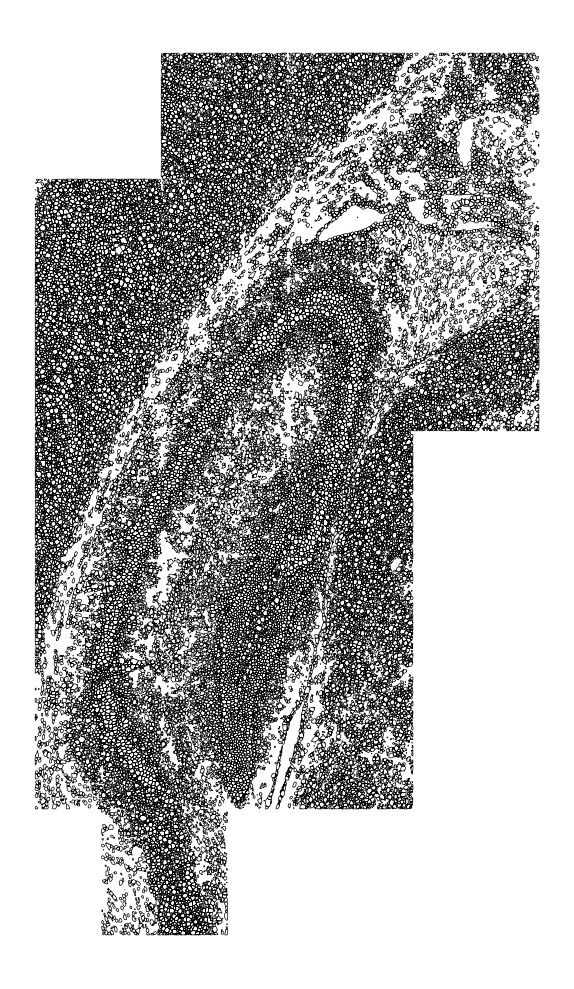

In [27]:
# If needed, fix invalid geometries
gdf['geometry'] = gdf['geometry'].apply(lambda g: g if g.is_valid else g.buffer(0))
gdf.crs = None  # Ensure no geographic distortion

# Plot only outlines
fig, ax = plt.subplots(figsize=(10, 10))
gdf.boundary.plot(ax=ax, linewidth=0.5, edgecolor='black')
ax.set_aspect('equal')
plt.axis('off')
plt.tight_layout()
plt.show()

## Sanity checks: compare Baysor segmentation with prior cell assignment
filtered_transcripts.csv: Original transcripts minus NaN values, controls and unassigned, this is passed to Baysor

In [28]:
transcripts = pd.read_csv(os.path.join(base_path, 'cosmx_mousebrain/filtered_transcripts.csv'))

In [29]:
baysor_seg = pd.read_csv(os.path.join(base_path, 'cosmx_mousebrain/segmentation.csv'))

In [30]:
print('n_cells in prior segmentation:', len(transcripts['cell_ID'].unique()))
print('n_cells in Baysor segmentation:', len(baysor_seg['cell_ID'].unique()))

n_cells in prior segmentation: 11292
n_cells in Baysor segmentation: 11292


In [31]:
baysor_n_transcripts_per_cell = baysor_seg.groupby("cell_ID").size().tolist()
original_n_transcripts_per_cell = transcripts.groupby("cell_ID").size().tolist()

In [51]:
print(baysor_n_transcripts_per_cell[50:70])
print(original_n_transcripts_per_cell[50:70])
print('-->Number of transcripts per cell very similar.')

[1822, 2717, 2123, 1194, 873, 2524, 2125, 2457, 2190, 2992, 2792, 2289, 2214, 2124, 2200, 3238, 1922, 3617, 2371, 3249]
[1857, 2751, 2153, 1209, 880, 2541, 2145, 2479, 2220, 3026, 2836, 2308, 2230, 2147, 2217, 3264, 1938, 3647, 2409, 3294]
-->Number of transcripts per cell very similar.


# 2 - Xenium
## Same as above!

In [24]:
#Load segmentation (optional)
#seg = pd.read_csv(os.path.join(base_path, 'xenium_mousebrain/no_unassigned/segmentation.csv'))

#Load stats (optional)
#stats = pd.read_csv(os.path.join(base_path, 'xenium_mousebrain/no_unassigned/segmentation_cell_stats.csv'))

#Load boundaries
with open(os.path.join(base_path, "xenium_mousebrain/no_unassigned/segmentation_polygons_2d.json"), "r") as f:
    boundaries = json.load(f)

In [34]:
import json
import geopandas as gpd
from shapely.geometry import shape

# Load the JSON file
with open(os.path.join(base_path, "xenium_mousebrain/no_unassigned/segmentation_polygons_2d.json"), "r") as f:
    geojson_data = json.load(f)

# Extract and convert features
features = geojson_data['features']
geometries = []
ids = []

for feature in features:
    try:
        geom = shape(feature['geometry'])
        geometries.append(geom)
        ids.append(feature.get('id'))  # optional
    except Exception as e:
        print(f"Error in feature {feature.get('id')}: {e}")

# Create GeoDataFrame
gdf = gpd.GeoDataFrame({'id': ids, 'geometry': geometries}, crs="EPSG:4326")  # or your correct CRS

# Count and fix invalid geometries
n_total = len(gdf)
n_invalid_before = (~gdf.is_valid).sum()
print(f"Total geometries: {n_total}")
print(f"Invalid geometries before fix: {n_invalid_before}")

# Attempt to fix invalid geometries
gdf['geometry'] = gdf['geometry'].apply(lambda g: g if g.is_valid else g.buffer(0))

n_invalid_after = (~gdf.is_valid).sum()
print(f"Invalid geometries after fix: {n_invalid_after}")
print(f"Geometries fixed: {n_invalid_before - n_invalid_after}")


Total geometries: 57556
Invalid geometries before fix: 667
Invalid geometries after fix: 0
Geometries fixed: 667


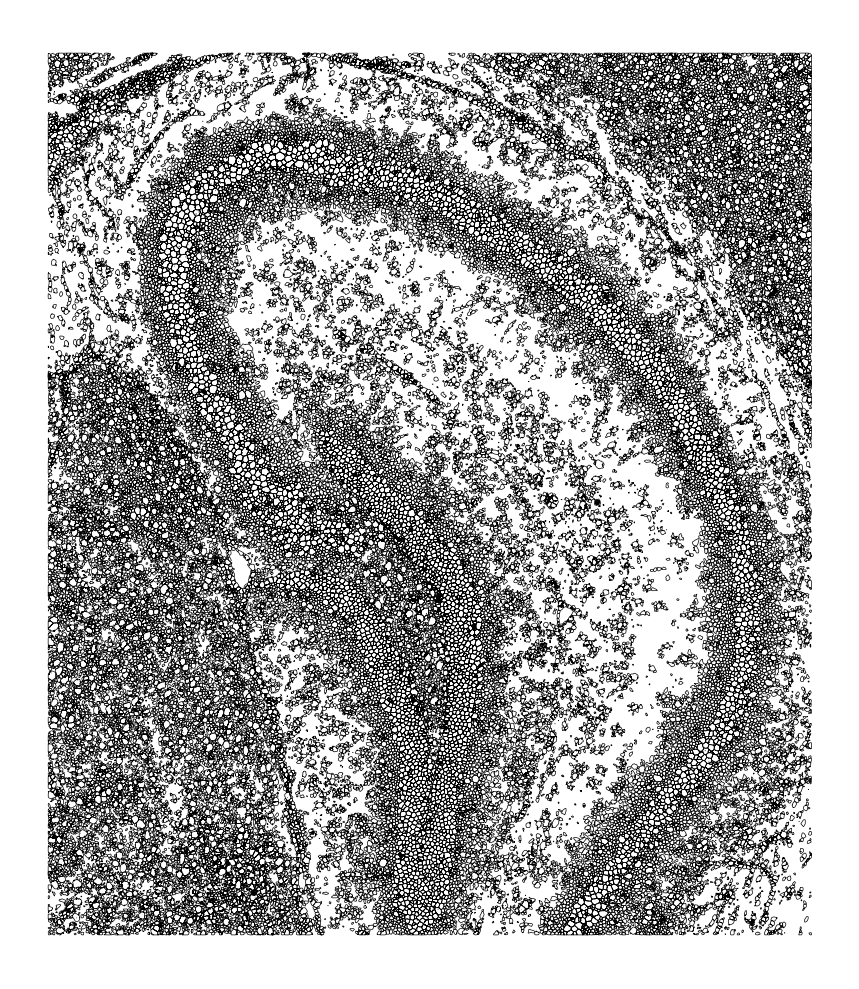

In [35]:
# If needed, fix invalid geometries
gdf['geometry'] = gdf['geometry'].apply(lambda g: g if g.is_valid else g.buffer(0))
gdf.crs = None  # Ensure no geographic distortion

# Plot only outlines
fig, ax = plt.subplots(figsize=(10, 10))
gdf.boundary.plot(ax=ax, linewidth=0.5, edgecolor='black')
ax.set_aspect('equal')
plt.axis('off')
plt.tight_layout()
plt.show()

In [42]:
transcripts = pd.read_csv(os.path.join(base_path, 'xenium_mousebrain/filtered_transcripts.csv'))

In [43]:
baysor_seg = pd.read_csv(os.path.join(base_path, 'xenium_mousebrain/no_unassigned/segmentation.csv'))

In [47]:
print('n_cells in prior segmentation:', len(transcripts['cell_id'].unique()))
print('n_cells in Baysor segmentation:', len(baysor_seg['cell_id'].unique()))

n_cells in prior segmentation: 9290
n_cells in Baysor segmentation: 9290


In [48]:
baysor_n_transcripts_per_cell = baysor_seg.groupby("cell_id").size().tolist()
original_n_transcripts_per_cell = transcripts.groupby("cell_id").size().tolist()

In [50]:
print(baysor_n_transcripts_per_cell[50:70])
print(original_n_transcripts_per_cell[50:70])
print('-->Number of transcripts per cell very similar.')

[1822, 2717, 2123, 1194, 873, 2524, 2125, 2457, 2190, 2992, 2792, 2289, 2214, 2124, 2200, 3238, 1922, 3617, 2371, 3249]
[1857, 2751, 2153, 1209, 880, 2541, 2145, 2479, 2220, 3026, 2836, 2308, 2230, 2147, 2217, 3264, 1938, 3647, 2409, 3294]
-->Number of transcripts per cell very similar.
